In [36]:
import os
import pandas as pd
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [37]:
dataset=pd.read_csv(r'data.csv',sep='|')
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

In [38]:
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [39]:
X = dataset.drop(['Name','md5','legitimate'],axis=1).values
y = dataset['legitimate'].values
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]
print(nbfeatures)
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.2)
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

14
1. feature DllCharacteristics (0.150493)
2. feature Characteristics (0.124420)
3. feature Machine (0.104218)
4. feature VersionInformationSize (0.069546)
5. feature SectionsMaxEntropy (0.055088)
6. feature ImageBase (0.053235)
7. feature Subsystem (0.049493)
8. feature MajorSubsystemVersion (0.045692)
9. feature SizeOfOptionalHeader (0.039513)
10. feature ResourcesMaxEntropy (0.038277)
11. feature ResourcesMinEntropy (0.036949)
12. feature SectionsMinEntropy (0.022745)
13. feature SizeOfStackReserve (0.020650)
14. feature MajorOperatingSystemVersion (0.018937)


In [40]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()   
}

In [41]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9903295907279971 
RandomForest : 0.9940601231437884 


/opt/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost : 0.984932995291561 
GradientBoosting : 0.9884099963781239 
GNB : 0.7002535313292285 
LinearRegression : 0.5795814419488124 


In [42]:
winner = max(results, key=results.get)

In [43]:
os.makedirs('classifier', exist_ok=True)
joblib.dump(model[winner],'classifier/classifier.pkl')

['classifier/classifier.pkl']

In [44]:
open('classifier/features.pkl', 'wb').write(pickle.dumps(features))

267

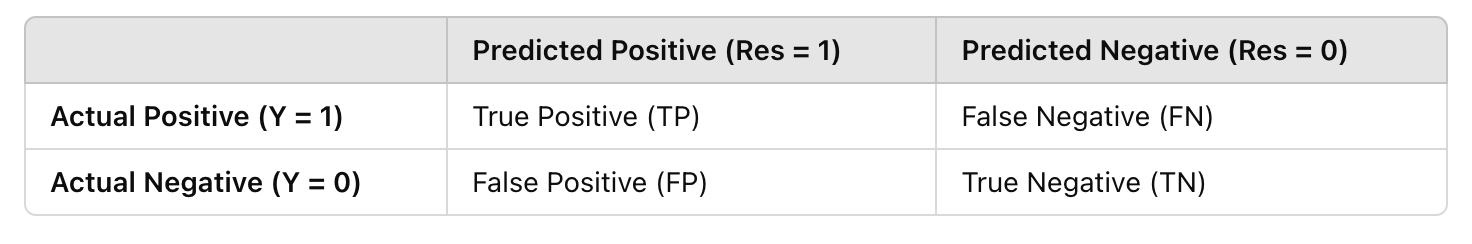

In [45]:
clf = model[winner]
res = clf.predict(X_new)
mt = confusion_matrix(y, res)
print(mt)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

[[96629    95]
 [   79 41244]]
False positive rate : 0.098218 %
False negative rate : 0.191177 %


In [46]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

precision = precision_score(y, res)
recall = recall_score(y, res)
f1 = f1_score(y, res)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9977019279614892
Recall: 0.9980882317353532
F1 Score: 0.9978950424620745


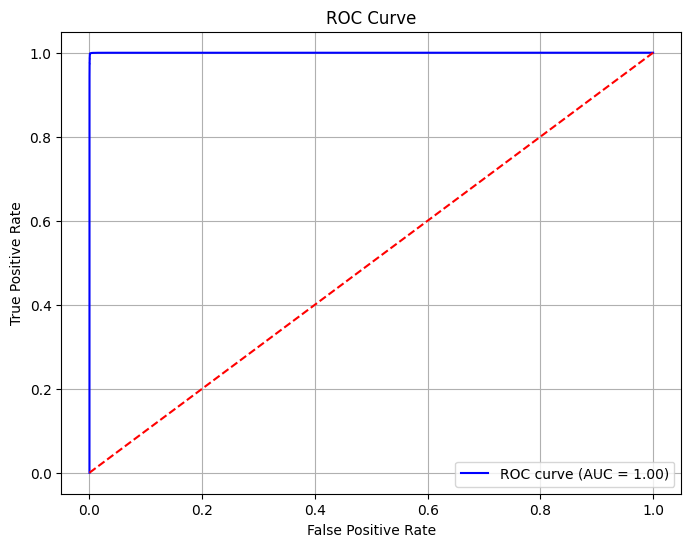

Training accuracy: 0.9999
Test accuracy: 0.9941


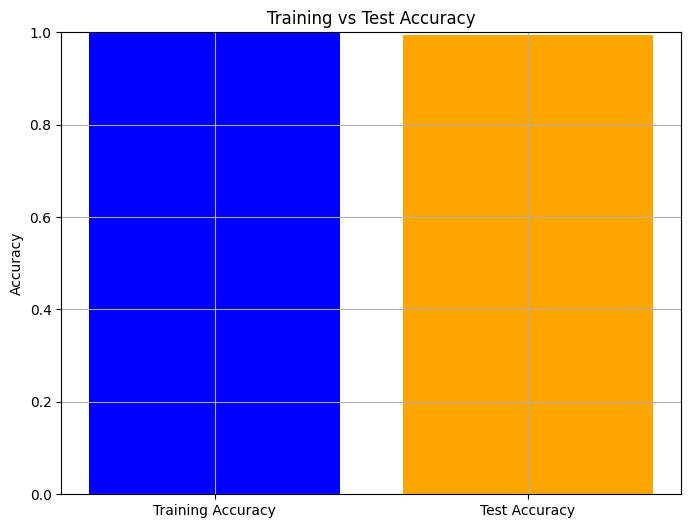

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X_new)[:, 1])  # 用預測的機率來計算
roc_auc = roc_auc_score(y, clf.predict_proba(X_new)[:, 1])


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [48]:
# Load classifier
clf = joblib.load('classifier/classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('classifier/features.pkl'),'rb').read())
features

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment']

In [49]:
pe_df = dataset[['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'legitimate']]
pe_df

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1
3,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1
4,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,212992,4194304.0,4096,512,5,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,45056,4194304.0,4096,512,1,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,122880,4194304.0,4096,512,5,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,53248,4194304.0,4096,512,1,0


In [ ]:
pe_df.to_csv("./dataset/final_pe_data.csv",index = False)

In [ ]:
%%writefile malware_test.py
#!/usr/bin/env python3
import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse



def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1
    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x*math.log(p_x, 2)
    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res

#extract the info for a given file
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)   
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)  
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res


if __name__ == '__main__':
    
    clf = joblib.load('classifier/classifier.pkl')
    features = pickle.loads(open(os.path.join('classifier/features.pkl'),'rb').read())
    data = extract_infos(sys.argv[1])
    pe_features = list(map(lambda x:data[x], features))

    res= clf.predict([pe_features])[0]    
    print ('The file %s is %s' % (os.path.basename(sys.argv[1]),['legitimate', 'malicious'][res]))

Overwriting malware_test.py


In [52]:
%run malware_test.py /Users/shengshan/Desktop/code/NTNU-AIS-YARA-Course/test/legitimate/calc.exe

The file calc.exe is malicious


In [53]:
%run malware_test.py /Users/shengshan/Desktop/code/NTNU-AIS-YARA-Course/test/malicious/0b9397a5316123179d30cfe988b310e27df1d7562d612150748531dd3ec771fc

The file 0b9397a5316123179d30cfe988b310e27df1d7562d612150748531dd3ec771fc is malicious
